In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mLmmbypP98EU6AS7lg1I")
project = rf.workspace("home-m8375").project("carscanner")
dataset = project.version(1).download("yolov7")

# Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions 

In [5]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 130 --data scratch.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=scratch.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=130, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [18]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/NP_D20.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/NP_D20.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/NP_D20.jpg: 448x640 2 dents, 11.3ms
Speed: 0.5ms pre-process, 11.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


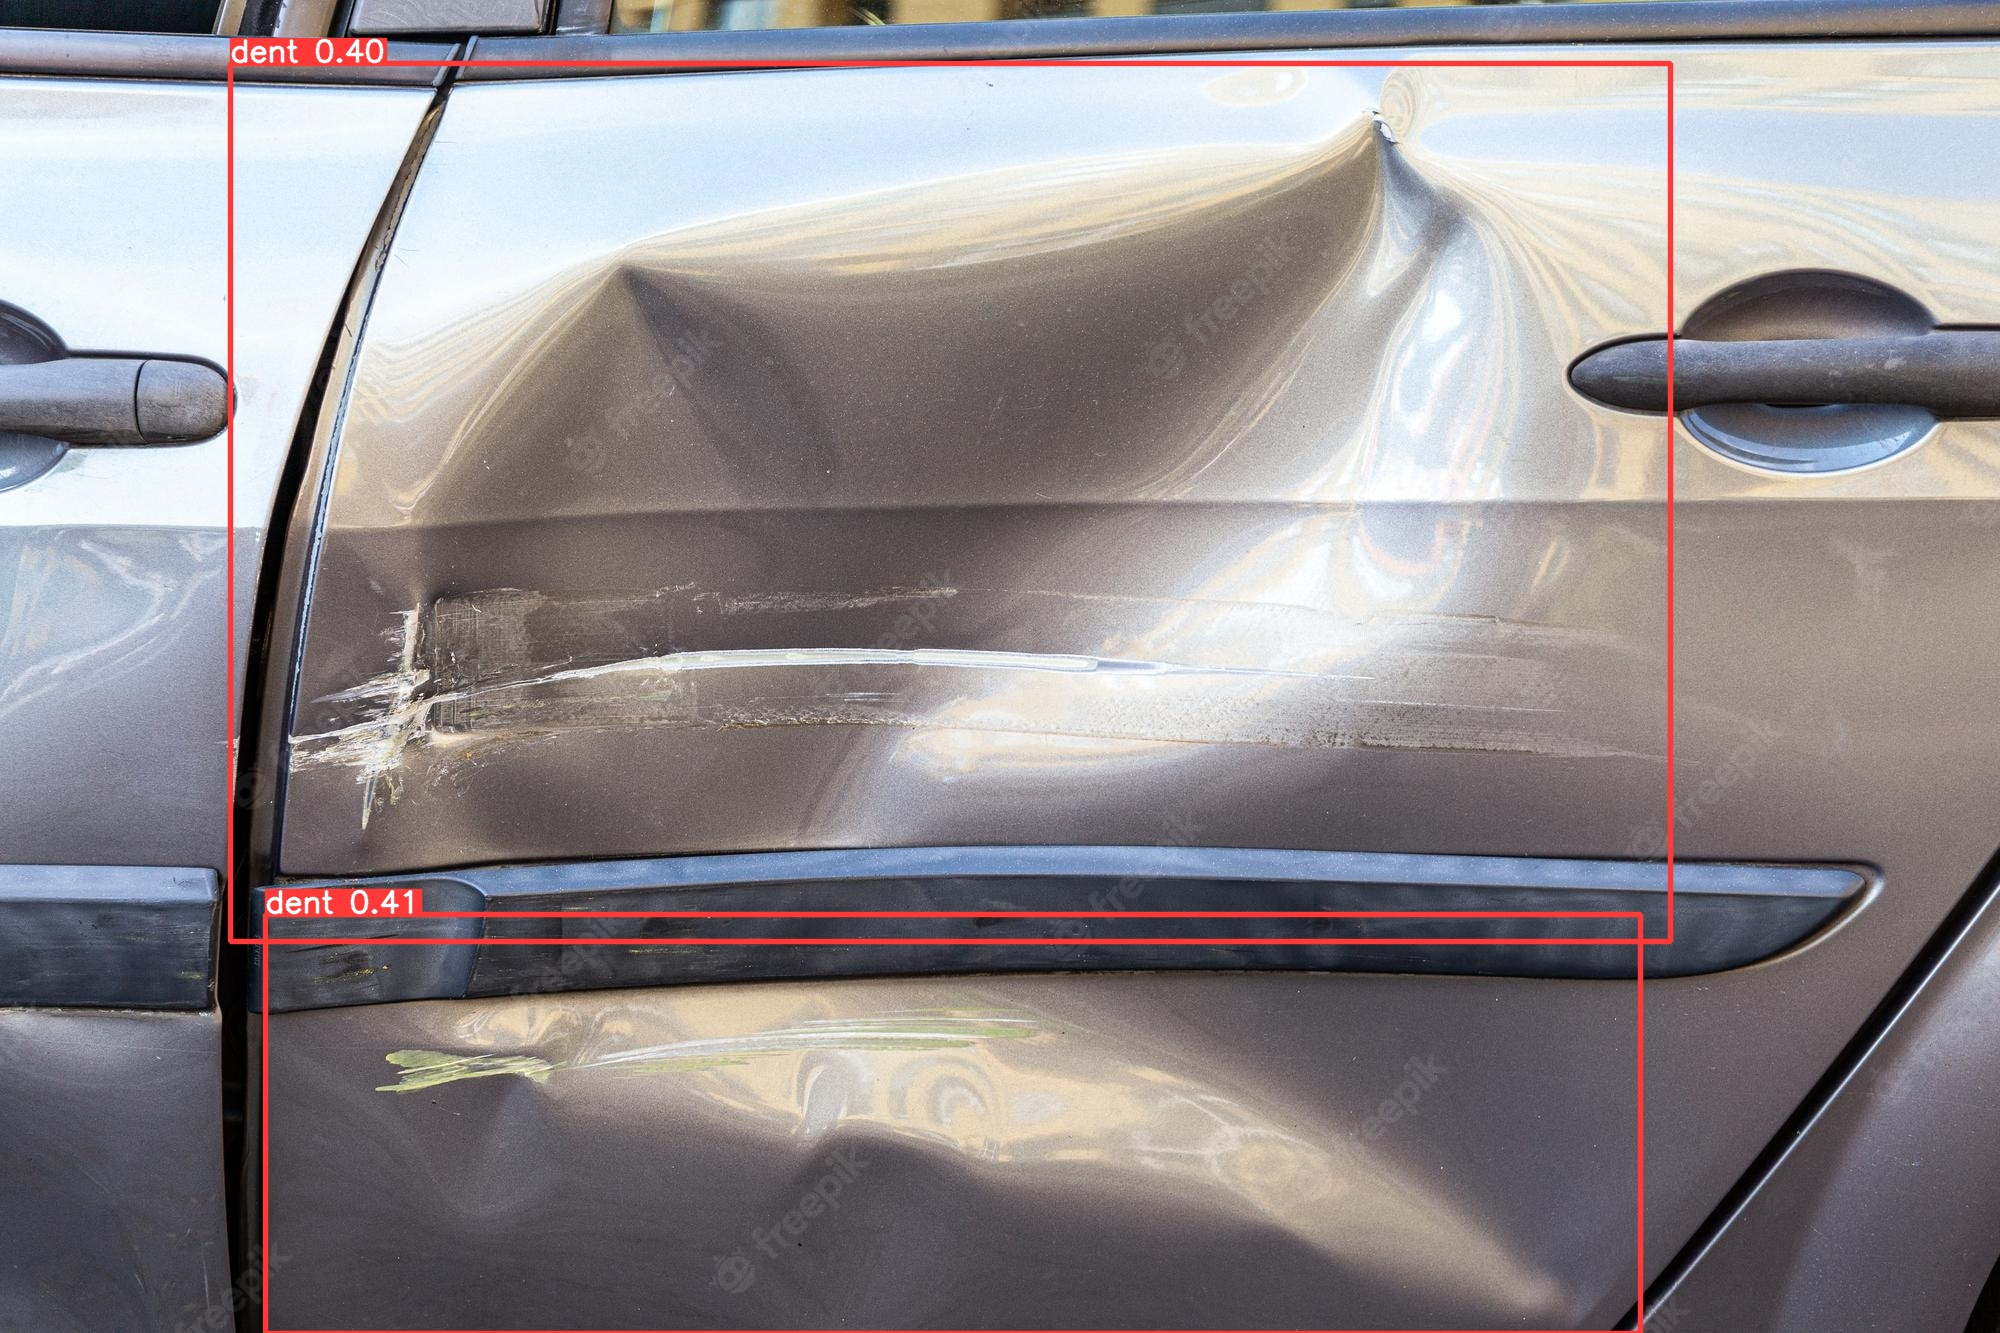

In [19]:
display.Image(filename='runs/detect/exp7/NP_D20.jpg', width=600)

In [ ]:
#Scratch-and-Dent-1
#110
0.852
0.709
0.994

#130
0.854
0.712
0.995

#150
0.84
0.684
0.995

#140
0.845
0.694
0.995


0.995

In [ ]:
#Dent-and-Scratch-1
#120
0.825
0.847
0.803

#110
0.846
0.854
0.837

#100
0.847
0.863
0.832

0.837